In [20]:
# Produce figure 1, phase portrait of Antonovsky model from Cantin2020
using Random
using PyPlot
using ChaosTools
using DrWatson
# @quickactivate :CSSim
include(joinpath(srcdir(), "n_forest.jl"))

antonovsky_sym_jacob

In [21]:
# Define parameters
ρ = 4.2
f = 1
h = 2

# Determine number of timesteps and initial states
T = 100
n_initial_points = 50
n_states = 2

# Create initial states
rng = MersenneTwister(42)
u0s = 5*rand(rng, Un_initial_points, n_states))

LoadError: syntax: extra token ")" after end of expression

In [22]:
# Numerically calculate fixed points
low = interval(0, 5)
high = interval(0, 5)
box = low × high
ds = one_forest_system(u0s[1, :]; ρ = ρ, f = f, h = h)

fps, eigs, stable = fixedpoints(ds, box, antonovsky_jacob)

┌ Warning: Non-unique fixed points found!
└ @ ChaosTools ~/.julia/packages/ChaosTools/VMXUY/src/stability/fixedpoints.jl:104


(2-dimensional StateSpaceSet{Float64} with 3 points, Vector{ComplexF64}[[-4.301091083023375 + 0.0im, 0.20109108302337475 + 0.0im], [-3.6429811473877054 + 0.0im, -0.45701885261229513 + 0.0im], [-4.609502310972899 + 0.0im, -0.39049768902710125 + 0.0im]], Bool[0, 1, 1])

In [23]:
## symbolic jacobian for antonvosky model
# antonovsky_sym_jacob()

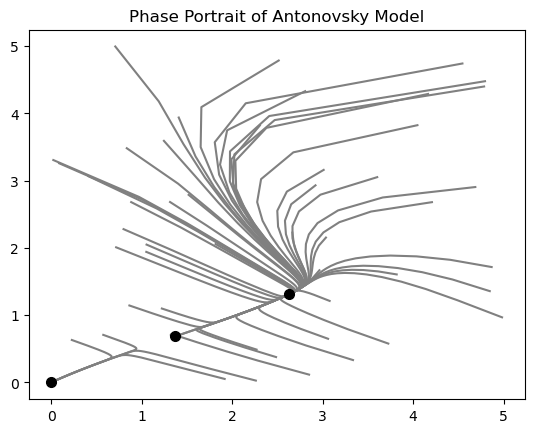

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa621a894e0>

In [26]:
# Iterate through initial states and create phase portrait
nrows = size(u0s)[1]
for i in 1:nrows
    ds = one_forest_system(u0s[i,:], ρ = ρ, f = f, h = h)
    trajectory_ds = trajectory(ds, T)
    X, _ = trajectory_ds
    young_tree_density, old_tree_density = X[:, 1], X[:, 2]
    plt.plot(young_tree_density, old_tree_density, color = "grey")
end

plt.title("Phase Portrait of Antonovsky Model")
marker_kwargs = Dict(
    :markerfacecolor => "black",
    :markeredgecolor => "black",
    :marker => "o",
    :markersize => 7,
)
plt.plot([fps[1, 1]], [fps[1, 2]]; marker_kwargs...) 
plt.plot([fps[2, 1]], [fps[2, 2]]; marker_kwargs...) 
plt.plot([fps[3, 1]], [fps[3, 2]]; marker_kwargs...) 

In [25]:
function interpret_eigenvalues(eigs)
    for i in 1:size(eigs)[1]
        eigenvalues = eigs[i, :]
        
        # Check if the eigenvalues are complex or real
        if isreal(eigenvalues[1]) && isreal(eigenvalues[2])
            # Real eigenvalues
            if sign(eigenvalues[1]) == sign(eigenvalues[2])
                # Eigenvalues have same sign
                if eigenvalues[1] < 0
                    println("Fixed point $i is a stable node.")
                else
                    println("Fixed point $i is an unstable node.")
                end
            else
                # Eigenvalues have different signs
                println("Fixed point $i is a saddle point.")
            end
        else
            # Complex eigenvalues
            if real(eigenvalues[1]) < 0
                println("Fixed point $i is a stable spiral.")
            else
                println("Fixed point $i is an unstable spiral.")
            end
        end
    end
end

# Call the function with your eigenvalues
interpret_eigenvalues(eigs)

LoadError: BoundsError: attempt to access 1-element Vector{Vector{ComplexF64}} at index [2]